#### Financial Time Series

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import datetime as date

import sklearn
import tensorflow as tf
from tensorflow import keras

#### EDA

In [8]:
# Import Data
stdpoors = pd.read_excel('/Users/dylanhayashi/Desktop/422 - Machine Learning/Module 9/M9A2 - Financial Time Series/sp_historical_data.xlsx')[::-1]
stdpoors = stdpoors.reset_index().drop('index', axis = 1)
stdpoors['Date'] = stdpoors.index + 1
stdpoors = stdpoors.rename(columns = {'Date' : 't'})

# Show
stdpoors

,t,Close
0,1,2363.64
1,2,2395.96
2,3,2381.92
3,4,2383.12
4,5,2375.31
...,...,...
1254,1255,4348.87
1255,1256,4304.76
1256,1257,4225.50
1257,1258,4288.70


In [9]:
# Info
stdpoors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       1259 non-null   int64  
 1   Close   1259 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 19.8 KB


In [10]:
# Describe
stdpoors.describe()

,t,Close
count,1259.000000,1259.000000
mean,630.000000,3187.588141
std,363.586303,688.889601
min,1.000000,2237.400000
25%,315.500000,2690.990000
50%,630.000000,2918.650000
75%,944.500000,3628.280000
max,1259.000000,4796.560000


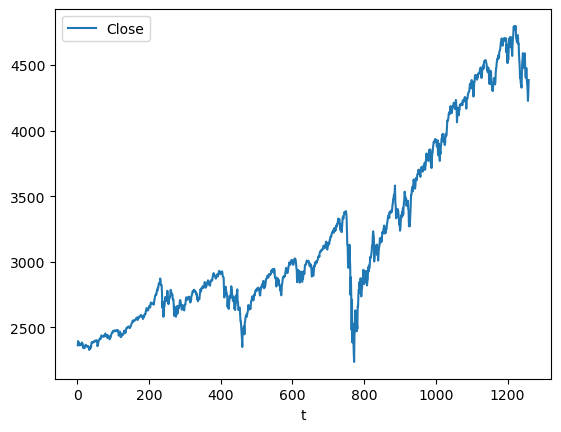

In [11]:
# Show Time-Series
stdpoors.plot('t','Close')
plt.show()

In [12]:
# Training and Test Split

train = stdpoors[0:1000]
test = stdpoors[1000:]

display(train.shape, test.shape)

(1000, 2)

(259, 2)

In [18]:
x_train = train.loc[:,'t']
y_train = train.loc[:,'Close']

Training Set:


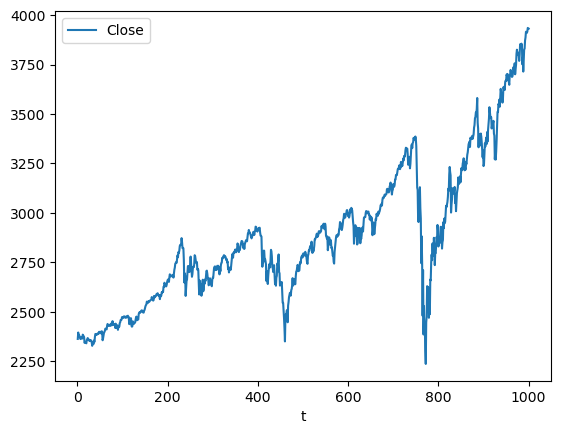

In [19]:
train.plot('t','Close')
print('Training Set:')
plt.show()

Test Set:


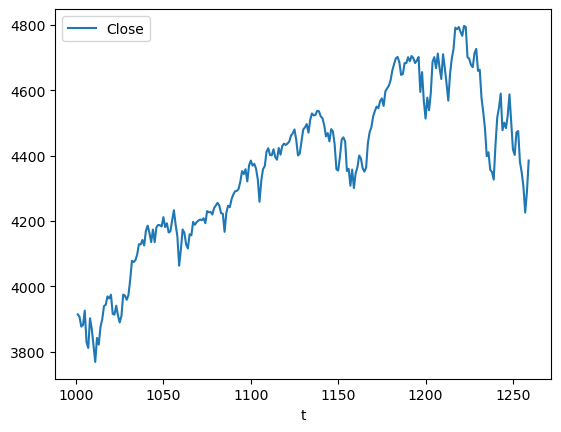

In [20]:
test.plot('t','Close')
print('Test Set:')
plt.show()

In [49]:
x_test = test.loc[:,'t']
y_test = list(test.loc[:,'Close'])

#### Model 1

#### Model 1 will produce results in which loss starts at 3-4 50% of the time. Please execute the cell below again if loss starts above that (usually low 60s).

Epoch 1/20
40/40 [==============================] - 0s 863us/step - loss: 2.8843
Epoch 2/20
40/40 [==============================] - 0s 808us/step - loss: 2.0341
Epoch 3/20
40/40 [==============================] - 0s 752us/step - loss: 1.6865
Epoch 4/20
40/40 [==============================] - 0s 787us/step - loss: 1.4843
Epoch 5/20
40/40 [==============================] - 0s 772us/step - loss: 1.3507
Epoch 6/20
40/40 [==============================] - 0s 733us/step - loss: 1.2533
Epoch 7/20
40/40 [==============================] - 0s 821us/step - loss: 1.1790
Epoch 8/20
40/40 [==============================] - 0s 887us/step - loss: 1.1205
Epoch 9/20
40/40 [==============================] - 0s 767us/step - loss: 1.0728
Epoch 10/20
40/40 [==============================] - 0s 730us/step - loss: 1.0333
Epoch 11/20
40/40 [==============================] - 0s 716us/step - loss: 0.9997
Epoch 12/20
40/40 [==============================] - 0s 773us/step - loss: 0.9719
Epoch 13/20
40/40 [======

,y_pred,t,S&P 500
0,4682.243164,1001,3913.97
1,4686.920898,1002,3906.71
2,4691.598145,1003,3876.50
3,4696.275391,1004,3881.37
4,4700.953125,1005,3925.43
...,...,...,...
254,5870.322754,1255,4348.87
255,5875.000488,1256,4304.76
256,5879.677734,1257,4225.50
257,5884.355469,1258,4288.70



Prediction:


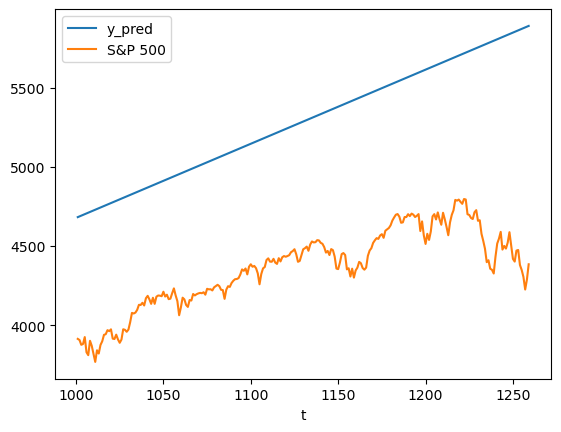

In [100]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[1, 1]),
    keras.layers.Dense(1)
])

model.compile(loss='msle', optimizer='sgd')
history = model.fit(stdpoors.loc[:,'t'], stdpoors.loc[:,'Close'], epochs=20)

# Make Rredictions
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(259)
y_pred_series = pd.Series(y_pred)
predictions = pd.DataFrame()
predictions['y_pred'] = y_pred_series
predictions['t'] = list(x_test)
predictions['S&P 500'] = y_test


display(predictions)

# Plot predictions
print('\nPrediction:')
predictions.plot(x = 't', y = ['y_pred','S&P 500'])
plt.show()

#### Model 2

Epoch 1/20
40/40 [==============================] - 1s 1ms/step - loss: 64.7772
Epoch 2/20
40/40 [==============================] - 0s 1ms/step - loss: 64.7772
Epoch 3/20
40/40 [==============================] - 0s 880us/step - loss: 64.7772
Epoch 4/20
40/40 [==============================] - 0s 966us/step - loss: 64.7772
Epoch 5/20
40/40 [==============================] - 0s 949us/step - loss: 64.7772
Epoch 6/20
40/40 [==============================] - 0s 917us/step - loss: 64.7772
Epoch 7/20
40/40 [==============================] - 0s 905us/step - loss: 64.7772
Epoch 8/20
40/40 [==============================] - 0s 1ms/step - loss: 64.7772
Epoch 9/20
40/40 [==============================] - 0s 988us/step - loss: 64.7772
Epoch 10/20
40/40 [==============================] - 0s 969us/step - loss: 64.7772
Epoch 11/20
40/40 [==============================] - 0s 958us/step - loss: 64.7772
Epoch 12/20
40/40 [==============================] - 0s 886us/step - loss: 64.7772
Epoch 13/20
40/40 [

,y_pred,t,S&P 500
0,-1.0,1001,3913.97
1,-1.0,1002,3906.71
2,-1.0,1003,3876.50
3,-1.0,1004,3881.37
4,-1.0,1005,3925.43
...,...,...,...
254,-1.0,1255,4348.87
255,-1.0,1256,4304.76
256,-1.0,1257,4225.50
257,-1.0,1258,4288.70



Prediction:


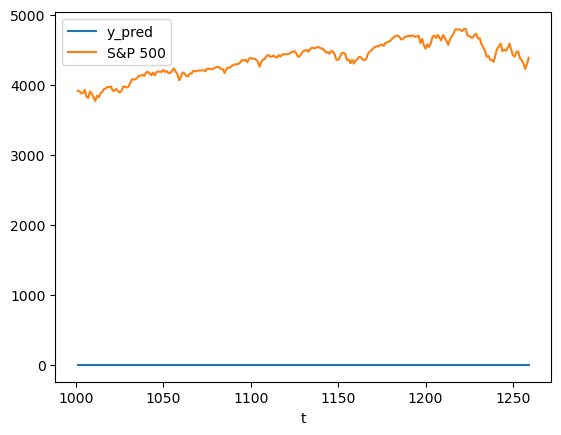

In [109]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape = (1,1))
])

model.compile(loss='msle', optimizer='sgd')
history = model.fit(stdpoors.loc[:,'t'], stdpoors.loc[:,'Close'], epochs=20)

# Make Rredictions
y_pred = model.predict(test.loc[:,'t'])
y_pred = y_pred.reshape(259)
y_pred_series = pd.Series(y_pred)
predictions = pd.DataFrame()
predictions['y_pred'] = y_pred_series
predictions['t'] = list(x_test)
predictions['S&P 500'] = y_test

display(predictions)

# Plot predictions
print('\nPrediction:')
predictions.plot(x = 't', y = ['y_pred','S&P 500'])
plt.show()

#### Model 3

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 53.0760
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 52.8154
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 52.8155
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 52.8154
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 52.8154
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 52.8154
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 52.8154
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 52.8155
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 52.8154
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 52.8154
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 52.8154
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 52.8154
Epoch 13/20
32/32 [==================

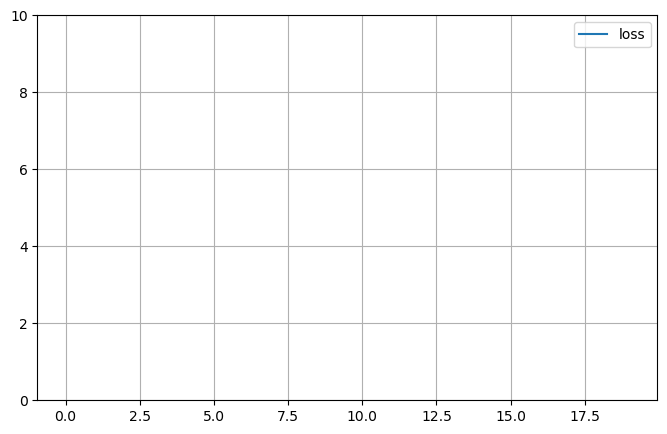

32/32 [==============================] - 0s 1ms/step - loss: 52.8154


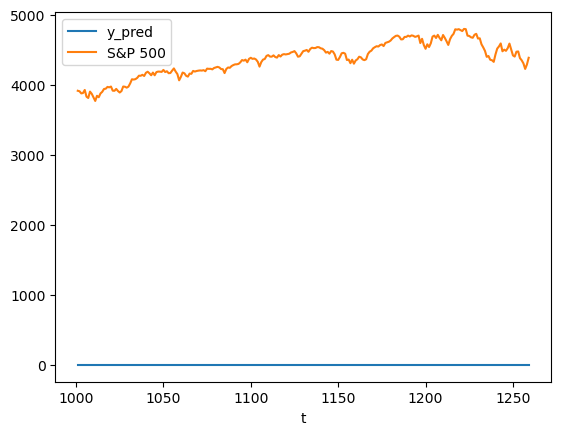

In [111]:
# Create model
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, return_sequences=True, input_shape=[1, 1]),
    keras.layers.SimpleRNN(1, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

# Parameters
model.compile(loss="msle", optimizer="sgd")

# Fit
rnn = model.fit(x_train, y_train, epochs = 20)

# Plot Loss 
pd.DataFrame(rnn.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.show()
score = model.evaluate(x_train, y_train)

# Make Rredictions
y_pred = model.predict(test.loc[:,'t'])
y_pred = y_pred.reshape(259)
y_pred_series = pd.Series(y_pred)
predictions = pd.DataFrame()
predictions['y_pred'] = y_pred_series
predictions['t'] = x_test
predictions['S&P 500'] = y_test

# Plot predictions
predictions.plot(x = 't', y = ['y_pred','S&P 500'])
plt.show()